In [19]:
from sklearn.datasets import make_regression 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import plotly.express as px # here it used for the 3d data ploting  with the dataframe 
import plotly.graph_objects as go


from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [5]:
x,y = make_regression(n_samples = 100,n_features =2,n_informative = 2 , n_targets = 1, noise = 50)

In [10]:
df = pd.DataFrame({'feature1':x[:,0],'feature2':x[:,1],'target':y})

In [11]:
df.head()

,feature1,feature2,target
0,0.351428,0.352755,57.766961
1,0.339203,0.523259,17.084612
2,-0.886443,0.652184,-19.705300
3,-1.159558,-1.327654,-43.062764
4,0.596308,-0.329048,-30.786017


In [13]:
df.shape

(100, 3)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  100 non-null    float64
 1   feature2  100 non-null    float64
 2   target    100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


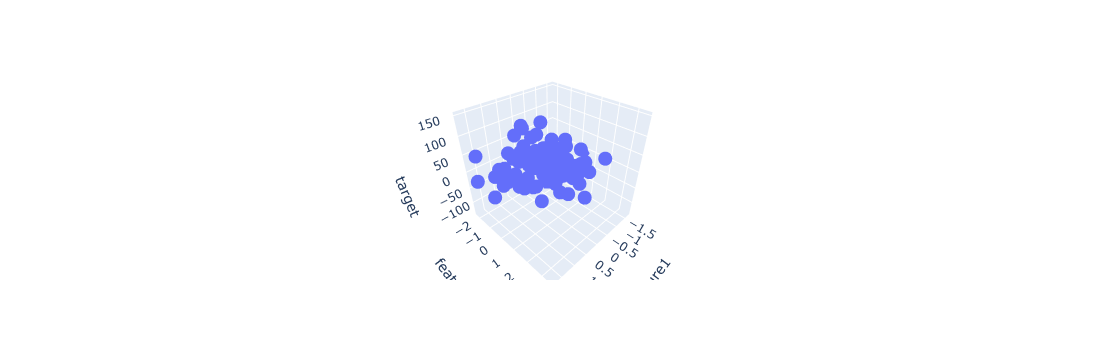

<Figure size 1400x800 with 0 Axes>

In [20]:
# plt.figure(figsize = (14,8))
fig = px.scatter_3d(df, x = 'feature1', y ='feature2', z = 'target')
fig.show()

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 3)

In [23]:
from sklearn.linear_model import LinearRegression 

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(x_test)

In [29]:
print('MAS',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('R2 score',r2_score(y_test,y_pred))

MAS 47.818413480161084
MSE 3033.850894122049
R2 score 0.27654862679127634


In [36]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))
final = np.vstack((xGrid.ravel(), yGrid.ravel())).T
z_final = lr.predict(final).reshape(10, 10)


In [42]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()

NameError: name 'z' is not defined